<a href="https://colab.research.google.com/github/jimsjoo/DL/blob/master/ML_%EC%8B%A4%EC%8A%B50612.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy
import sklearn
 
print('np.__version__'+np.__version__)
print('sklearn.__version__'+sklearn.__version__)
print('scipy.__version__'+scipy.__version__)

np.__version__1.18.4
sklearn.__version__0.22.2.post1
scipy.__version__1.4.1


150개의 데이터와 4개의 속성인 꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비가 있으며 각 속성의 최소값, 최대값, 평균 등을 볼 수 있다. 목적 속성은 0, 1, 2이며 iris.target_names으로 볼 수 있으며 Setosa, Versicolour, Virginica다 iris 객체는 data와 target 속성을 가지고 있으며 data는 iris 데이터의 속성들이며, target은 목적 속성이다. 

In [0]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.DESCR)
print(iris.target_names)

In [0]:
X, y = iris.data, iris.target
print('Size of data : %s' % (X.shape, )) 
print('Target value : %s' % np.unique(y))

Size of data : (150, 4)
Target value : [0 1 2]


In [0]:
print(X[0:10, :])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


#k-Fold Cross-Validation

1. Shuffle the dataset randomly.
1. Split the dataset into k groups
1. For each unique group:
  1. Take the group as a hold out or test data set
  1. Take the remaining groups as a training data set
  1. Fit a model on the training set and evaluate it on the test set
  1. Retain the evaluation score and discard the model
1. Summarize the skill of the model using the sample of model evaluation scores

A poorly chosen value for k may result in a mis-representative idea of the skill of the model, such as a score with a high variance (that may change a lot based on the data used to fit the model), or a high bias, (such as an overestimate of the skill of the model).

The value for k is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset.

In [0]:
# [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
# Fold1: [0.5, 0.2]
# Fold2: [0.1, 0.3]
# Fold3: [0.4, 0.6]

Three models are trained and evaluated with each fold <br>given a chance to be the held out test set.
- Model1: Trained on Fold1 + Fold2, Tested on Fold3
- Model2: Trained on Fold2 + Fold3, Tested on Fold1
- Model3: Trained on Fold1 + Fold3, Tested on Fold2

In [0]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

In [0]:
kfold = KFold(3, True, 3)

In [0]:
data = [33,56,76,32,87,99]

In [0]:
# enumerate splits
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (train, test))

train: [0 1 2 4], test: [3 5]
train: [0 2 3 5], test: [1 4]
train: [1 3 4 5], test: [0 2]


In [0]:
import random 

# data = [33,56,76,32,87,99]

# for i in range(10):
#   random.shuffle(data)  
#   print(data, data[0:2], data[2:])

import copy 

data = [33,56,76,32,87,99]

# def train_test(data):
#   duplicate = copy.copy(data)  
# # 함수사용목적은 반복을 줄이는 것이므로
# # 이번 예에서 함수내 루프는 안바람직함(주관적 판단)
#   for i in range(5):
#     random.shuffle(duplicate)
#     # return을 만나면 결과를 돌려주면서 함수 종료
#     # 결과적으로 1번째 섞은 결과만 돌려줌
#     return duplicate[0:2], duplicate[2:]  
#   # 아래의 코드는 마지막 섞은 결과만 돌려줌      
#   return duplicate[0:2], duplicate[2:]

def train_test(data):
  duplicate = copy.copy(data)    
  random.shuffle(duplicate)  
  return duplicate[0:2], duplicate[2:]
  
for i in range(5):
  train, test = train_test(data)
  print (data, train, test)

In [0]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# prepare cross validation
kfold = KFold(3, True, 1)

# enumerate splits
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

1e-7
=1<sub>-10000000</sub>


In [0]:
import math

def entropy_cal(array):
    total_entropy = 0
    for i in array:
        total_entropy += -i * math.log(i + 1e-7, 2)
    return total_entropy

# +1e-7 = 1*10^-7
probabilities = [0.5, 0.5]
entropy = entropy_cal(probabilities)
print(entropy)

probabilities = [1.0, 0.0]
entropy = entropy_cal(probabilities)
print(entropy)

probabilities = [0.9, 0.1]
entropy = entropy_cal(probabilities)
print(entropy)

0.9999997114610208
-1.4426949695965583e-07
0.4689953050503533


In [0]:
display(math.log(0+1e-7,2), math.log2(0+1e-7))

-23.25349666421154

-23.253496664211536

In [0]:
# 로그함수는 밑이 자연상수 e, 혹은 10, 또는 2 이냐에 따라서 np.log(x), np.log10(x), np.log2(x) 를 구분해서 사용
import numpy as np

print(np.log(0+1e-7)) 
print(np.log2(0+1e-7))

-16.11809565095832
-23.253496664211536


In [0]:
import math

distance= ( [5, 4, 3], [1, 7, 9] )
dst1 = distance[0]
dst2 = distance[1]

def euc_dst(dst1,dst2):  
  # sum = 0.0
  # for d1, d2 in zip(dst1,dst2):
  #   sum+=(d1-d2)**2
  # return sum**0.5
  # return math.sqrt(sum)
  return math.sqrt(sum([(d1-d2)**2 for d1, d2 in zip(dst1,dst2)]))
# math.sqrt(
#     sum(
#         [
#          (d1-d2)**2 
#             for d1, d2 
#                 in zip(dst1,dst2)
#          ]
#         )
#     )

print(euc_dst(dst1,dst2))

7.810249675906654


In [0]:
import numpy as np

distance= ( [5, 4, 3], [1, 7, 9] )

dst1=np.array(distance[0])
dst2=np.array(distance[1])

print(dst1-dst2)
print((dst1-dst2)**2)
print(sum((dst1-dst2)**2))
print(math.sqrt(sum((dst1-dst2)**2)))

# numpy를 이용한 계산 예
def euc_distance(d):
  # np.array로 데이터 변환
  dst1=np.array(d[0])
  dst2=np.array(d[1])
  # 브로드캐스팅으로 한번에 차이를 계산하고
  # 차이의 제곱을 만들어 합산을 한다. 
  return math.sqrt(sum((dst1-dst2)**2)) 

print(euc_distance(distance))   

[ 4 -3 -6]
[16  9 36]
61
7.810249675906654
7.810249675906654


In [0]:
def euclidean_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += (pt1[i] - pt2[i]) ** 2
  return distance ** 0.5

print(euclidean_distance([5, 4, 3], [1, 7, 9]))

7.810249675906654


In [0]:
def man_dst(dst):
  dst1=dst[0]
  dst2=dst[1]
  dst_sum = 0.0
  for d1,d2 in zip(dst1,dst2):
    dst_sum += abs(d1-d2)
  return dst_sum
  

d = ( [5, 4, 3], [1, 7, 9])  
print(man_dst(d))

13.0


In [0]:
def manhattan_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += abs(pt1[i] - pt2[i])
  return distance

print(manhattan_distance([5, 4, 3], [1, 7, 9]))

13


In [0]:
def hamming_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    if pt1[i] != pt2[i]:
      distance += 1
  return distance

print(hamming_distance([5, 4, 3], [1, 7, 9]))

3


In [0]:
def ham_dst(p1,p2):
  d1=np.array(p1)
  d2=np.array(p2)
  return sum(d1!=d2)

print(ham_dst([5, 4, 3], [1, 7, 9]))

3


In [0]:
d1 = np.array([5, 4, 3])
d2 = np.array([1, 7, 9])
display(d1 != d2)

# false = 0
# 0이 아닌 것은 모두 true

# True + True  => 2
# True * False => 0
# 즉 True = 1, False = 0  

array([ True,  True,  True])

In [0]:
from scipy.spatial import distance

print(distance.euclidean([1, 2], [4, 0]))
print(distance.cityblock([1, 2], [4, 0]))
print(distance.hamming([5, 4, 9], [1, 7, 9]))

3.605551275463989
5
0.6666666666666666


In [60]:
def min_max_normalize(lst):
    normalized = []    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

 
lst = [1000, 765, 800]
print(min_max_normalize(lst))

[1.0, 0.0, 0.14893617021276595]


In [64]:
def z_score_normalize(lst):
    normalized = []

    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

lst = [1000, 765, 800] 
print(z_score_normalize(lst))

# NUMPY 브로드캐스팅을 사용한 정규화, 수식과 가장 비슷한 형태
print((np.array(lst)-np.mean(lst))/np.std(lst))


[1.4006774632809225, -0.869386011691607, -0.5312914515893153]
[ 1.40067746 -0.86938601 -0.53129145]


In [61]:
import numpy as np

data = np.array([
    [1000, 10, 0.5],
    [765, 5, 0.35],
    [800, 7, 0.09], ])
data

array([[1.00e+03, 1.00e+01, 5.00e-01],
       [7.65e+02, 5.00e+00, 3.50e-01],
       [8.00e+02, 7.00e+00, 9.00e-02]])

In [0]:
for d in np.transpose(data):
  print(min_max_normalize(d))  

[1.0, 0.0, 0.14893617021276595]
[1.0, 0.0, 0.4]
[1.0, 0.6341463414634146, 0.0]


In [0]:
for d in np.transpose(data):
  print(z_score_normalize(d))

[1.4006774632809225, -0.869386011691607, -0.5312914515893153]
[1.2977713690461004, -1.1355499479153375, -0.16222142113076238]
[1.1020718464618129, 0.21647839841214184, -1.3185502448739541]


In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit_transform(data))

[[1.         1.         1.        ]
 [0.         0.         0.63414634]
 [0.14893617 0.4        0.        ]]


In [0]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
print(standardScaler.fit_transform(data))

[[ 1.40067746  1.29777137  1.10207185]
 [-0.86938601 -1.13554995  0.2164784 ]
 [-0.53129145 -0.16222142 -1.31855024]]


In [0]:
from sklearn.preprocessing import normalize

data = normalize(data, axis=0, norm='max')
print(data)

[[1.    1.    1.   ]
 [0.765 0.5   0.7  ]
 [0.8   0.7   0.18 ]]


# K-최근접 이웃(K-Nearest Neighbors)을 활용한 분류

In [0]:
# Test distance function
# [x, y, type]
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

### 실습1

In [0]:
from math import sqrt

# calculate the Euclidean distance between two vectors
# row = [x, y, type]
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [72]:
row0 = [3,3]

for row in dataset:
  # print(row)
	distance = euclidean_distance(row0, row)
	print(distance)

0.4999413724239892
1.6618084384528082
1.455363576481383
1.9799775331569336
0.06429164440002412
4.633788925710958
2.5041731830324157
4.110602084800699
6.536159883896061
4.701344046082375


### 실습2

In [0]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)	
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		# print(distances[i])
		neighbors.append(distances[i][0])
	return neighbors

In [74]:
neighbors = get_neighbors(dataset, row0, 3)
for neighbor in neighbors:
	print(neighbor)

[3.06407232, 3.005305973, 0]
[2.7810836, 2.550537003, 0]
[3.396561688, 4.400293529, 0]


### 실습3

In [0]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	for neighbor in neighbors:
		print(neighbor)
		print(neighbor[-1])		
	output_values = [row[-1] for row in neighbors]
	print('output_values')
	print(output_values)
	prediction = max(set(output_values), key=output_values.count)
	return prediction,output_values

In [0]:
row0 = [3,3,0]
row0 = [6,5,0]
predictio,output_values = predict_classification(dataset, row0, 3)
# print('Expected %d, Got %d.' % (row0[-1], prediction))

[7.673756466, 3.508563011, 1]
1
[3.396561688, 4.400293529, 0]
0
[7.627531214, 2.759262235, 1]
1
output_values
[1, 0, 1]


In [0]:
output_values
# max(set(output_values), key=output_values.count)

[1, 0, 1]

In [0]:
row0 = [6,5,0]
prediction = predict_classification(dataset, row0, 3)
print('Expected %d, Got %d.' % (row0[-1], prediction))

[7.673756466, 3.508563011, 1]
[3.396561688, 4.400293529, 0]
[7.627531214, 2.759262235, 1]
Expected 0, Got 1.


## KNeighborsClassifier 이용한 kNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# 이제 KNeighborsClassifier 모델을 생성해야 하는데, 이 때 n_neighbors로 k를 정해줘야 한다. 
# (그리고 x 데이터를 분류를 할 때 k개의 이웃 중 거리가 가까운 이웃의 영향을 더 많이 받도록 
# 가중치를 설정하려면 weights = "distance"를 지정해줄 수 있는데 여기서는 일단 생략)
classifier = KNeighborsClassifier(n_neighbors = 3)

In [0]:
# 그 다음 데이터를 .fit() 시켜준다. x 데이터는 여러 개의 차원으로 이루어진 배열(점들의 집합)이 되고,
# y 데이터는 레이블(각 점들의 분류 결과)가 된다. 이 예제에서는 0 아니면 1로 분류되는 거다.
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]

training_labels = [0, 1, 1]

classifier.fit(training_points, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

guesses = classifier.predict(unknown_points)

In [0]:
guesses

array([1, 1, 1])

In [0]:
from sklearn.datasets import load_breast_cancer
# sklearn에서 제공하는 예시 데이터 중 유방암 데이터를 사용
breast_cancer_data = load_breast_cancer()

In [0]:
import pandas as pd
#데이터 확인하기
df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [0]:
df_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [0]:
# 0과 1이 각각 어떤 걸 의미하는지는 이렇게 .target_names을 찍어보면 알 수 있다.
# 악성(malignant), 양성(benign)
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [0]:
# 항목 이름(컬럼) 같은 것도 없고, 그냥 30개 항목에 대한 값만 쭉 들어 있다. 
# 값이 아주 크거나 아주 작은 것이 있다
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
# 각 항목별로 최대/최소값을 비롯한 기초 통계량을 확인하기 위해 .describe()를 찍어보았다.
# 3번 컬럼은 최대 값이 2501이나 되는데, 9번 컬럼은 0.097이 최대값이다. 최소값도 항목에 따라 편차가 크다.
# 항목마다 스케일이 너무나 달라 정규화 필요
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [0]:
for x in range(len(df_data.columns)):
    df_data[x] = min_max_normalize(df_data[x])

# 모든 항목이 최소값은 0, 최대값은 1로 변환된 걸 확인할 수 있다.
df_data.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,0.106345,0.189324,0.099376,0.062636,0.181119,0.174439,0.080540,0.223454,0.178143,0.100193,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,0.100421,0.121917,0.095267,0.084967,0.102067,0.134498,0.076227,0.116884,0.116316,0.091417,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,0.043781,0.104690,0.040004,0.020635,0.117483,0.081323,0.038106,0.144686,0.102409,0.046750,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,0.077023,0.165267,0.072092,0.033112,0.158650,0.136675,0.065379,0.207047,0.152643,0.079191,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,0.133044,0.246155,0.122509,0.071700,0.218683,0.226800,0.106187,0.278651,0.219480,0.126556,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# 데이터 세트 분리하기 (Training & Validation)
from sklearn.model_selection import train_test_split

#실제로 생성한 분류 모델의 성능을 테스트를 해봐야 하니까 학습(training) 세트와 검증(validation) 세트를 분리
#데이터에는 분류된 레이블(target)이 있으니, 검증 데이터를 예측 모델에 넣어서 실제 그 레이블(정답)을 잘 맞추는지 본다
#데이터 세트 분리는 sklearn에서 train_test_split을 통해 손쉽게 할 수 있다. 
#데이터 세트를 나누는 비율을 지정할 수도 있는데 기본 값은 0.75:0.25, 즉 3:1이다. 3으로 학습해서 1로 시험보는 거다. 
#만약 비율을 바꾸고 싶다면 test_size의 값만 0에서 1사이로 넣어주면 된다. 
#데이터 세트를 나눌 때 난수를 바탕으로 무작위로 나누게 되는데, random_state는 이때 난수의 초기값을 고정시켜 주는 기능이다. 
#random_state = 100 이라고 지정해놓았으니, 나중에도 이렇게 적어주면 이 실험 결과를 재현할 수 있다. (안 그러면 매번 다르게 나눠줄 거다.)

training_data, validation_data , training_labels, validation_labels = train_test_split(df_data, df_labels, test_size = 0.2, random_state = 100)

In [0]:
# 갯수 확인
print(len(training_data))
print(len(validation_data))
print(len(training_labels))
print(len(validation_labels))

455
114
455
114


In [0]:
from sklearn.neighbors import KNeighborsClassifier

#모델을 생성하는데 k=3으로 지정
classifier = KNeighborsClassifier(n_neighbors = 3)

In [0]:
#생성한 모델에 데이터를 학습시키자. 
#위에서 나눠놓은 학습 데이터 세트(training_data, training_labels)로 학습시킨다.
classifier.fit(training_data, training_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
#모델의 정확도(Accuracy) 평가하기
#KNeighborsClassifier에서는 .score()를 쓰면 모델의 정확도를 바로 확인할 수 있다.
print(classifier.score(validation_data, validation_labels))

0.9649122807017544


In [0]:
classifier.predict(validation_data)

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1])

#K-최근접 이웃(K-Nearest Neighbors)을 활용한 회귀

In [0]:
#sklearn KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

In [0]:
#회귀 모델을 생성한다. 이 때 n_neighbors, 즉 k를 정해줘야 한다. 
#그리고 위에서 설정한 가중 평균을 적용하기 위해 weights = "distance"를 넣어주었다. 
#(이렇게 써주지 않으면 weight의 기본값은 단순한 평균을 사용하는 방법, “uniform”이 적용된다.)
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")

In [0]:
#데이터를 .fit() 시켜준다. 학습 데이터는 여러 개의 차원으로 이루어진 배열이 될 거고, 
#레이블은 (분류가 아니라 회귀를 사용하는 것이라서 범주형 데이터가 아닌) 
#연속적인 데이터, 즉 수치가 들어오게 된다.
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]

training_labels = [5.0, 6.8, 9.0]
regressor.fit(training_points, training_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')

In [0]:
#새로운 값들을 분류하고 싶다면 .predict()를 사용
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

guesses = regressor.predict(unknown_points)

In [0]:
guesses

array([7.28143288, 7.76451922, 6.8457845 ])

# 오류 평가 실습

In [0]:
def evalErrors(labels, guesses):
  true_positives = 0
  true_negatives = 0
  false_positives = 0
  false_negatives = 0

  for i in range(len(guesses)):
    #True Positives
    if labels[i] == 1 and guesses[i] == 1:
      true_positives += 1
    #True Negatives
    if labels[i] == 0 and guesses[i] == 0:
      true_negatives += 1
    #False Positives
    if labels[i] == 0 and guesses[i] == 1:
      false_positives += 1
    #False Negatives
    if labels[i] == 1 and guesses[i] == 0:
      false_negatives += 1

  return  true_positives, true_negatives, false_positives, false_negatives

labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
guesses = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

true_positives, true_negatives, false_positives, false_negatives = evalErrors(labels, guesses)

print('true_positives: %s' % true_positives)
print('true_negatives: %s' % false_positives)
print('false_positives: %s' % true_negatives)
print('false_negatives: %s' % false_negatives)

# 머신러닝 분류 모델의 성능 평가 지표 Accuracy, Recall, Precision, F1

In [0]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
guesses = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

print(accuracy_score(labels, guesses))
print(recall_score(labels, guesses))
print(precision_score(labels, guesses))
print(f1_score(labels, guesses))

#선형회귀

In [0]:
import numpy as np

x_train = np.array([1., 2., 3., 4., 5., 6.])
y_train = np.array([9., 12., 15., 18., 21., 24.])

W = 0.0
b = 0.0

n_data = len(x_train)

epochs = 5000
learning_rate = 0.01

for i in range(epochs):
    hypothesis = x_train * W + b
    cost = np.sum((hypothesis - y_train) ** 2) / n_data
    gradient_w = np.sum((W * x_train - y_train + b) * 2 * x_train) / n_data
    gradient_b = np.sum((W * x_train - y_train + b) * 2) / n_data

    # if i % 100 == 0:
        # print('Epoch ({:10d}/{:10d}) cost: {:10f}, W: {:10f}, b:{:10f}'.format(i, epochs, cost, W, b))

    W -= learning_rate * gradient_w
    b -= learning_rate * gradient_b


print('W: {:10f}'.format(W))
print('b: {:10f}'.format(b))
print('result : ')
print(x_train * W + b)

W:   3.000000
b:   6.000000
result : 
[ 8.99999996 11.99999997 14.99999998 18.         21.00000001 24.00000002]


###LinearRegression을 사용한 선형회귀

In [0]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

x_train = np.array([1., 2., 3., 4., 5., 6.])
y_train = np.array([9., 12., 15., 18., 21., 24.])
df=pd.DataFrame({'X':x_train, 'y':y_train})
X=df['X']
y=df['y']

In [0]:
m = LinearRegression()
m.fit(X.values.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(m.coef_ , m.intercept_)

[3.] 5.999999999999998


In [0]:
y_predicted =m.predict([[7.]])
print(y_predicted)

[27.]


#로지스틱회귀(Logistic Regression) 

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
#LogisticRegression 모델을 생성하고, 그 안에 속성들(features)과 그 레이블(labels)을 fit 시킨다
model = LinearRegression()
model.fit(features, labels)
#fit() 메서드는 모델에 필요한 두 가지 변수를 전달해준다.
#계수: model.coef_
#절편: model.intercept_

In [0]:
#.predict()를 사용하면 새로운 속성들을 넣었을 때 
#그 레이블에 속하는지 아닌지 1또는 0으로 구성된 벡터를 반환해준다.
model.predict(features)

In [0]:
#분류 결과가 아니라, 해당 레이블로 분류될 확률 값을 알고 싶다면 
#.predict_proba()를 사용한다. 
#각 샘플에 대한 확률을 0에서 1사이의 값으로 돌려준다
model.predict_proba(features)

##타이타닉 탑승객 명단으로 알아본 로지스틱 회귀 분석

###1. 데이터 불러오기

In [0]:
import pandas as pd

passengers = pd.read_csv("passengers.csv")
print(passengers.shape)
print(passengers.head())

###2. 데이터 전처리하기

####분석에 사용할 feature 고르기
일단 생존 여부에 중요한 영향을 미쳤을 것으로 예상하는 값들만 추려보면, Sex, Age, Pcalss를 생각해볼 수 있다. 여성, 어린이, 1/2/3등석 순으로 살아남을 확률이 높다고 가설을 세워본 거다.

####문자열을 숫자로 변환하기
일단 머신러닝 라이브러리 sklearn에 넣어주기 전에 성별(Sex)는 숫자 데이터 1과 0으로 바꿔주자. 여성이 살아남을 확률이 높을 것 같으니 남성을 0, 여성을 1로 놓자.

In [0]:
passengers['Sex'] = passengers['Sex'].map({'female':1,'male':0})

####결측치 채워주기
데이터를 보면 Age 값이 비어있는 경우가 있다. 이 경우 그냥 평균 값으로 대체해서 넣어주자.

In [0]:
passengers['Age'].fillna(value=passengers['Age'].mean(), inplace=True)

####feature 분리하기
Pcalss의 경우 1등석에 탔는지, 2등석에 탔는지에 대해 각각의 feature로 만들어주기 위해 컬럼을 새로 생성해보자.

In [0]:
passengers['FirstClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 1 else 0)
passengers['SecondClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 2 else 0)

이제 데이터 세트를 이렇게 준비

In [0]:
features = passengers[['Sex', 'Age', 'FirstClass', 'SecondClass']]
survival = passengers['Survived']

###3. 학습세트/평가세트 분리하기

In [0]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, survival)

###4. 데이터 정규화(스케일링) 하기
로지스틱 회귀는 실행할 때 regularation을 사용하기 때문에 그 전에 반드시 우리가 가진 데이터를 스케일링하는 작업이 필요하다. (이 부분은 이해 안 가더라도 일단 그냥 해야 된다고 생각하자.)

sklearn이 제공하는 StandardScaler를 활용해서 손쉽게 할 수 있다. StandardScaler는 평균 0, 표준편차 1로 변환하는 방법이지만 이외에도 최소값 0, 최대값 1이 되도록 변환하는 MinMaxScaler, 중앙값(median) 0, IQR(interquartile range) 1이 되도록 변환하는 RobustScaler 등이 있다.

StandardScaler를 사용하면 아래와 같이 데이터를 정규화(스케일링) 할 수 있다.

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

fit_transform 은 fit과 transform을 합친 건데, fit은 일단 각 속성(feature)마다 컬럼을 만드는 작업이라고 생각하면 된다. 이후 transform을 통해 데이터를 변형시키는 거다.

그래서 위 코드에서도 학습세트로 fit을 한 번 해주었기 때문에, 평가세트에서는 별도로 fit을 할 필요 없이 바로 transform하면 되는 거다.
###5. 모델 생성 및 평가하기
모델을 생성하는 방법은 아래와 같다.

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_features, train_labels)

데이터만 넣어주고 fit 해주면 끝이다.

그러면 이제 학습 세트로 정확도를 바로 찍어볼 수 있다.

In [0]:
print(model.score(train_features, train_labels))

각 feature들의 계수(coefficients)를 확인해볼 차례다. 어떤 feature가 생존에 큰 영향을 주는지 확인

In [0]:
print(model.coef_)

Sex, Age, FirstClass, SecondClass 순으로 넣었기 때문에 그 순서대로 확인해주면 된다. 성별이 1(여자)이고, 일등석 탑승 여부가 중요하다는 걸 알 수 있다. 반면 나이에 대한 계수는 음수가 나오는데 나이가 많을수록 생존 확률이 낮아진다는 의미로 이해하면 되겠다.

###5. 예측하기
이번엔 새로운 데이터를 넣어서 예측해보자.

예를 들면 아래와 같이 타이타닉 영화 실제 주인공이었던 Jack, Rose의 값을 임의로 만들고, 내 정보도 넣어봤다. (가상이니까… 1등석에 탄 걸로 해봤다.)

In [0]:
import numpy as np

Jack = np.array([0.0, 20.0, 0.0, 0.0])
Rose = np.array([1.0, 17.0, 1.0, 0.0])
ME = np.array([0.0, 32.0, 1.0, 0.0])

sample_passengers = np.array([Jack, Rose, ME])

그 다음 위에서 했던 것처럼 데이터 스케일링을 다시 해줘야 한다.

In [0]:
sample_passengers = scaler.transform(sample_passengers)

예측을 해보자.

In [0]:
print(model.predict(sample_passengers))

Rose만 살고 Jack과 나는 죽는 걸로 나온다.

In [0]:
print(model.predict_proba(sample_passengers))

확률을 확인해보자.

#서포트 벡터 머신(Support Vector Machine)

In [0]:

from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')

training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0]

classifier.fit(training_points, labels) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#.predict() 메서드를 통해 분류를 해볼 수 있다. 
#예를 들어 [3, 2]라는 데이터를 넣어 예측을 하려면 
print(classifier.predict([[3, 2]]))
# 결과가 1이면 빨간 점, 0이면 파란 점

[1]


In [0]:
#서포트 벡터, 결정 경계를 정의하는 서포트 벡터를 확인하려면
print(classifier.support_vectors_)

[[7. 5.]
 [8. 2.]
 [2. 2.]]


#의사결정 나무(Decision Tree)

In [0]:
import math
from collections import defaultdict, Counter
from functools import partial

###데이터셋
목표는 해당 학습 데이터 세트로 특정 직원이 인터뷰를 잘 할 수 있을지 예측하는 것이다. 데이터는 직원의 직급과 사용하는 프로그래밍 언어, 트위터 계정 유무, 박사 학위 유무와, 라벨로서 과거 인터뷰 평가(잘했으면 True, 아니면 False) 내역이 주어져있다.

In [0]:
dataset = [
    ({'level': 'Senior', 'lang': 'Java', 'tweets': 'no', 'phd': 'no'}, False),
    ({'level': 'Senior', 'lang': 'Java', 'tweets': 'no', 'phd': 'yes'}, False),
    ({'level': 'Mid', 'lang': 'Python', 'tweets': 'no', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'Python', 'tweets': 'no', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'R', 'tweets': 'yes', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'R', 'tweets': 'yes', 'phd': 'yes'}, False),
    ({'level': 'Mid', 'lang': 'R', 'tweets': 'yes', 'phd': 'yes'}, True),
    ({'level': 'Senior', 'lang': 'Python', 'tweets': 'no', 'phd': 'no'}, False),
    ({'level': 'Senior', 'lang': 'R', 'tweets': 'yes', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'Python', 'tweets': 'yes', 'phd': 'no'}, True),
    ({'level': 'Senior', 'lang': 'Python', 'tweets': 'yes', 'phd': 'yes'}, True),
    ({'level': 'Mid', 'lang': 'Python', 'tweets': 'no', 'phd': 'yes'}, True),
    ({'level': 'Mid', 'lang': 'Java', 'tweets': 'yes', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'Python', 'tweets': 'no', 'phd': 'yes'}, False)
]

###셰넌 엔트로피
어떤 상태가 얼마만큼의 정보를 담고 있는가를 측정한 것이다. 
이는 정보량이라 표현할 수 있으며, 정보이론의 기초를 따르면 
정보를 더 많이 알면 알수록 새롭게 알 수 있는 정보는 적어지므로, 
엔트로피가 높을수록 새로운 정보일 가능성이 높다. 
이는 다시말하면, 정보량은 상태의 불확실성과 관계가 있다. 

In [0]:
def entropy(class_probabilities):
    return sum(-p * math.log(p, 2) for p in class_probabilities if p)

###데이터셋의 라벨에 대한 확률분포
데이터셋에서 각 데이터가 특정 라벨에 속할 확률 계산. 

이 코드에 데이터셋을 넣어서 결과를 확인하면, 
[0.35714285714, 0.64285714] 이다. 
각각 False, True 라벨에 속할 확률이다.

In [0]:
def class_probabilities(dataset):
    '''학습데이터로 특정 라벨에 속할 확률 구하기: [False에 속할 확률, True에 속할 확률]'''
    labels = [label for _, label in dataset]
    total_count = len(labels) # 데이터셋 총 개수
    return [count / total_count for count in Counter(labels).values()]

데이터셋의 엔트로피

In [0]:
def data_entropy(dataset):
    probabilities = class_probabilities(dataset)
    return entropy(probabilities)

이는 전체 데이터셋에 대한 엔트로피이다. 하지만, 결정 트리의 각 레벨을 넘기다보면 데이터셋이 분할되므로, 여러개로 분할된 각각의 데이터셋의 엔트로피를 조합하여 전체 데이터셋의 엔트로피를 구할 수 있어야 한다. 이는 각 엔트로피의 가중합으로 정의할 수 있다.

In [0]:
def partition_entropy(subsets):
    total_count = sum(len(subset) for subset in subsets) # q를 구하기 위한 전체 데이터셋 길이
    return sum(data_entropy(subset) * (len(subset) / total_count)
              for subset in subsets)

###Decision tree 생성 알고리즘
ID3 알고리즘에 기반하면, 기본은 그리디 알고리즘이며, 이는 각 순간마다 최적의 선택을 한다는 뜻이다. 최적의 선택 기준은 위에서 설명한 엔트로피가 될 것이고, 모든 단계를 지나면 특정값이 나와야 하므로, 엔트로피가 작은쪽이 최적의 선택이라 할 수 있겠다. 결정트리의 기본적인 로직은 각 속성에 대하여 파티션을 나누고 단계를 진행하면 할 수록 엔트로피는 최소값이 되어 이는 결국 결과값이 되는 것이다.

이를 기반하여, 데이터셋을 속성에 따라 파티셔닝해야 하므로, 이를 코드화하면 아래와 같다.

In [0]:
def partition_by(inputs, attribute):
    groups = defaultdict(list)
    for input in inputs:
        key = input[0][attribute]
        groups[key].append(input)
    return groups

각 파티션에 의해 분할된 데이터셋들의 전체 엔트로피가 기준이 된다고 하였으므로, 이를 코드화하면 아래와 같다.

In [0]:
def partition_entropy_by(inputs, attribute):
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())

이를 이용하여, 각 파티션에 대한 엔트로피를 구하여 최소화되는 파티션을 구하고, 서브트리를 만들 수 있다. 먼저 전체 데이터셋에서 엔트로피가 최소화되는 속성을 구해야 한다.

In [0]:
for key in ['level', 'lang', 'tweets', 'phd']:
    print(key, partition_entropy_by(dataset, key))

# level 0.693536138896
# lang 0.860131712855
# tweets 0.788450457308
# phd 0.892158928262

level 0.6935361388961918
lang 0.8601317128547441
tweets 0.7884504573082896
phd 0.8921589282623617


level 속성으로 분할하면 엔트로피가 가장 낮아지므로, 결정트리의 루트 노드는 level 속성으로 분할해야 할 것이다. 분할된 데이터셋은 각각 Senior, Mid, Junior 셋이므로 이 세개의 셋에 대하여 각각 서브트리를 구해야한다.

먼저 Mid 셋을 보면, 모든 클래스의 값이 True 이므로, 서브트리를 만들 필요없이 True를 리턴한다.

Senior 셋을 보면, tweets로 분할한 데이터셋들의 엔트로피가 0이므로, tweets로 분할하여 서브트리를 만든다.

Junior 셋을 보면, phd로 분할하면 엔트로피가 0이므로, phd로 분할하여 서브트리를 만든다.

이를 도식화하면, 아래와 같다.

In [0]:
#  level? -- Senior --> tweets? -- no --> False
#         |                     |- yes --> True
#         |- Mid --> True
#         |- Junior --> phd? -- no --> True
#                            |- yes --> False

이 과정을 자동화하면 다음과 같다.

첫째로, ID3 알고리즘을 구현하면, 아래와 같다.

In [0]:
def build_tree_id3(inputs, split_candidates=None):
    if split_candidates is None:
        split_candidates = inputs[0][0].keys()

    num_inputs = len(inputs)
    num_trues = len([label for item, label in inputs if label])
    num_falses = num_inputs - num_trues

    if num_trues == 0:
        return False
    if num_falses == 0:
        return True

    if not split_candidates:
        return num_trues >= num_falses

    best_attribute = min(split_candidates, key=partial(partition_entropy_by, inputs))

    partitions = partition_by(inputs, best_attribute)
    new_candidates = [a for a in split_candidates
                     if a != best_attribute]

    subtrees = { attribute_value: build_tree_id3(subset, new_candidates)
        for attribute_value, subset in partitions.items() }

    subtrees[None] = num_trues > num_falses 
    return (best_attribute, subtrees)

이후, 분류기를 구현하면 다음과 같다.

In [0]:
  def classify(tree, input):
    if tree in [True, False]:
        return tree
    attribute, subtree_dict = tree
    subtree_key = input.get(attribute)
    if subtree_key not in subtree_dict:
        subtree_key = None
    subtree = subtree_dict[subtree_key]
    return classify(subtree, input)

###결과 #
아래와 같은 새로운 직원 데이터에 대하여 이 직원이 인터뷰를 잘할 수 있을지 예측해보자.

In [0]:
# 새로운 데이터
data = {"level": "Junior", "lang": "Java", "tweets": "yes"}

# 학습데이터를 이용하여 결정트리 생성
tree = build_tree_id3(dataset)
# 실제로 분류해보기
classify(tree, data)
# 결과: True

True

#k-Means 군집분석

In [0]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns

url ='https://raw.githubusercontent.com/jimsjoo/DL/master/dataset/titanic_train.csv'
titanic = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
cluster_data = titanic[['Fare','Age']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)
cluster_data.sort_values(by=['Fare','Age'], inplace=True)
cluster_array = np.array(cluster_data)

In [0]:

print(cluster_array[0:10])

[[ 0.     19.    ]
 [ 0.     25.    ]
 [ 0.     36.    ]
 [ 0.     38.    ]
 [ 0.     39.    ]
 [ 0.     40.    ]
 [ 0.     49.    ]
 [ 4.0125 20.    ]
 [ 5.     33.    ]
 [ 6.2375 61.    ]]


In [0]:
# Calculate Euclidean distance between two observations
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [0]:
k = 4
cluster_vars = []

centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 507874.0
1 259347.0
2 229172.0
3 182890.0
4 145160.0
5 128549.0
6 120822.0
7 111083.0
8 108858.0
9 108504.0
10 108219.0
11 107999.0
12 107851.0
13 107678.0
14 107171.0
15 106905.0
16 106818.0
17 106803.0
18 106799.0
19 106798.0
20 106796.0


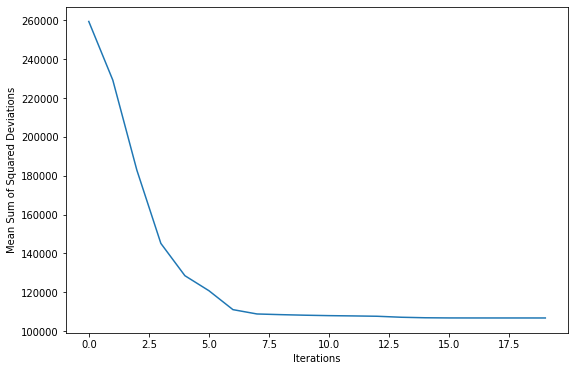

In [0]:

plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
plt.savefig('mean_ssd', bpi=150)

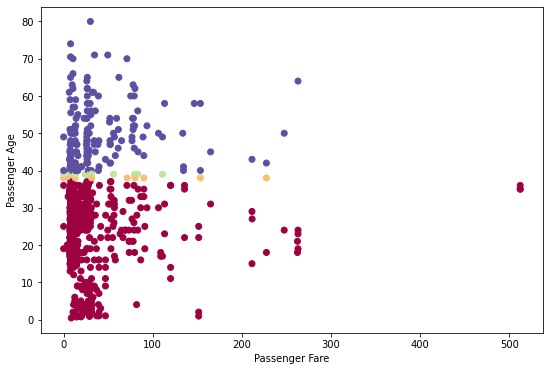

In [0]:

plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
plt.savefig('initial_clusters', bpi=150)

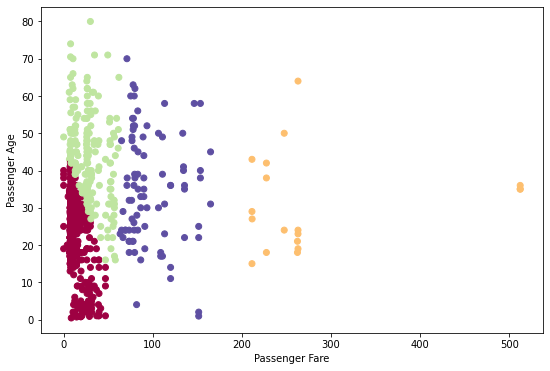

In [0]:

plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
plt.savefig('final_clusters', bpi=150)

In [0]:
results_df = cluster_data.join(titanic[['Survived']], 
                               how='left').reset_index(drop=True)
results_df = pd.concat([results_df,
                        pd.DataFrame(initial_clusters, 
                                     columns=['initial_cluster']),
                        pd.DataFrame(clusters, 
                                     columns=['converged_cluster'])],
                       axis=1)

In [0]:
pivot_initial = (results_df.pivot_table(values=['Survived'], 
                                        index=['initial_cluster'],
                                        aggfunc='mean'))
pivot_initial['label'] = ['Initial' for i in range(pivot_initial.shape[0])]

pivot_converged = results_df.pivot_table(values=['Survived'], 
                                         index=['converged_cluster'],
                                         aggfunc='mean')
pivot_converged['label'] = ['Converged' for i in range(pivot_converged.shape[0])]

pivot_df = pd.concat([pivot_initial, pivot_converged], axis=0).reset_index()
pivot_df = pivot_df.rename({'index': 'Cluster',
                            'Survived': 'Survival Percentage (%)'}, axis=1)

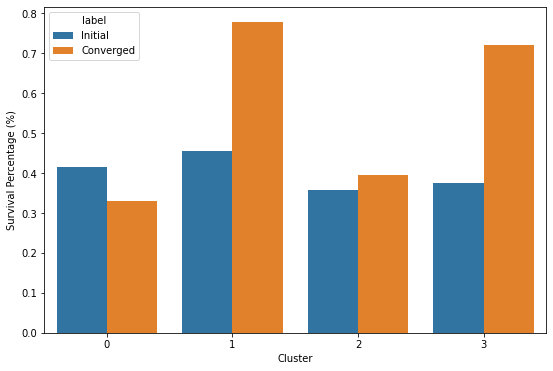

In [0]:
plt.subplots(figsize=(9,6))
sns.barplot(x='Cluster', y='Survival Percentage (%)', 
            hue='label', data=pivot_df);
plt.savefig('survival', bpi=150)